<a href="https://colab.research.google.com/github/segnig/Kaggle-Competitions/blob/main/titanic/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
FILE_PATH = "/content/drive/MyDrive/Data Science/titanic/"

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading

In [4]:
train_data = pd.read_csv(FILE_PATH + "train.csv")
test_data = pd.read_csv(FILE_PATH + "test.csv")

What the data is look like?

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


$plot\ ratio\ of\ survived\ for\ the\ categorical\ variable$

In [6]:
def plot_ratio_of_survived(feature):
    train_data.groupby(feature)["Survived"].mean().plot(kind="bar", color=["blue", "orange", "green", "red", "purple", "brown"])

    # Set title and axis labels
    plt.title(f"Survival Rate by {feature}")
    plt.xlabel(f"{feature}")
    plt.ylabel("Survival Rate")

    # Show the plot
    plt.show()


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


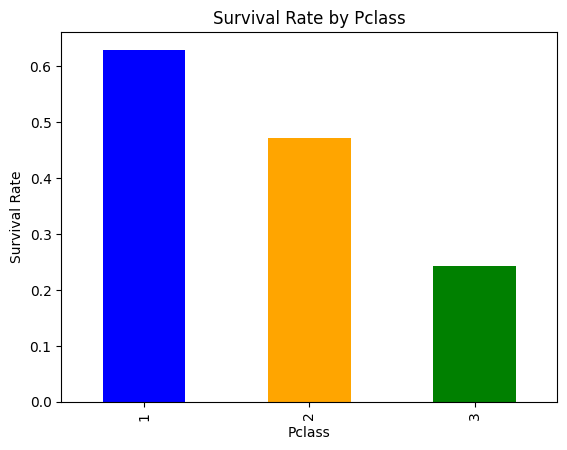

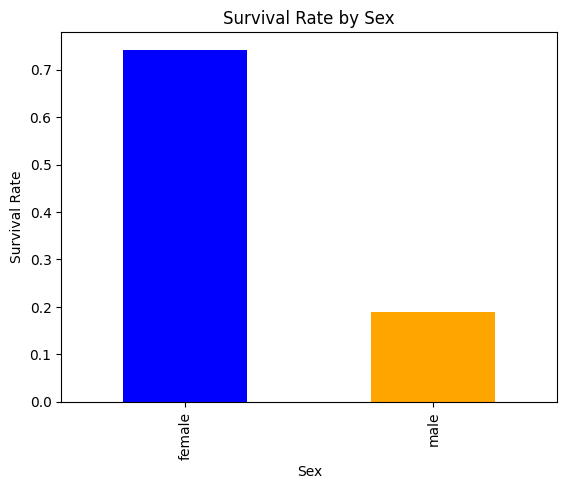

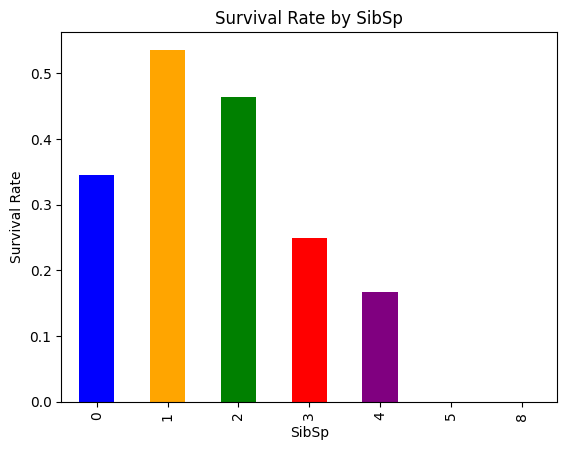

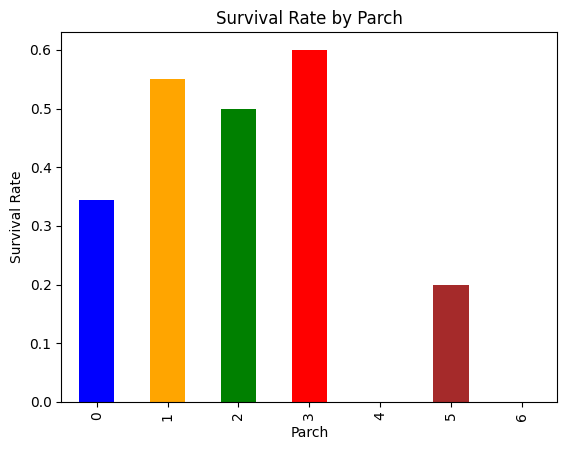

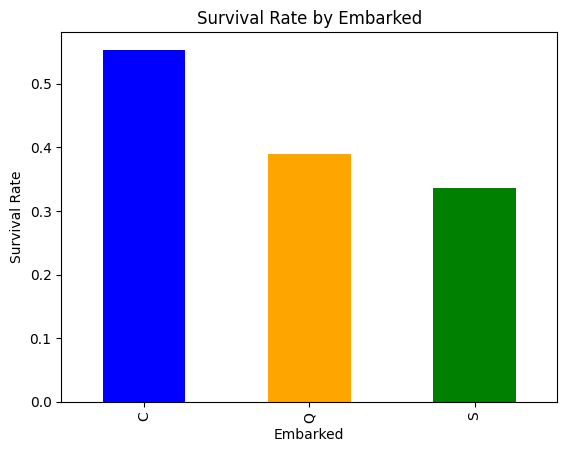

In [8]:
categorical_varialbes = [ 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

# plot survival ratio plot for every categorical variables
for var in categorical_varialbes:
    plot_ratio_of_survived(var)

# `Feature Engineering`

## Name Features

In [9]:
train_data["Name"].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


`Name`is in the format `*, Title. *`

In [10]:
train_data["title"] = train_data["Name"].str.extract(r"([A-Za-z]+)\. ")
print(train_data["title"].value_counts())

test_data["title"] = test_data["Name"].str.extract(r"([A-Za-z]+)\. ")
print(test_data["title"].value_counts())

title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64
title
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: count, dtype: int64


---

### Function Documentation: `title_mapping`

#### **Description**:
The `title_mapping` function maps various titles into broader, predefined categories to standardize and simplify title data. This can be useful for tasks such as feature engineering, demographic analysis, or data cleaning in datasets containing titles.

---

#### **Function Signature**:
```python
def title_mapping(title):
```

#### **Parameters**:
- **`title`** (*str*):  
  A string representing an individual's title (e.g., "Mr", "Mrs", "Dr").  
---

#### **Returns**:
- (*str*): A string representing the broader category into which the input title is grouped. Possible return values include:
  - `"Mr"`: Includes adult male titles such as "Mr", "Don", "Rev", and others.
  - `"Miss"`: Includes titles for unmarried women such as "Miss", "Ms", and "Mlle".
  - `"Mrs"`: Includes titles for married women such as "Mrs" and "Mme".
  - `"Master"`: Specifically used for young boys.
  - `"Noble"`: For noble titles such as "Sir", "Lady", "Countess", and "Jonkheer".
  - `"Military"`: For military titles such as "Capt".
  - `"Other"`: A fallback category for any unmapped or unrecognized titles.

---

In [11]:
def title_mapping(title):
    """
    Maps various titles into broader categories.

    Args:
        title (str): The title to be mapped.

    Returns:
        str: A broader category for the title.
    """
    title = title.strip().capitalize()  # Handle case and whitespace variations
    if title in ["Mr", "Don", "Rev", "Dr", "Major", "Col"]:
        return "Mr"
    elif title in ["Ms", "Mlle", "Miss"]:
        return "Miss"
    elif title in ["Mme", "Mrs"]:
        return "Mrs"
    elif title == "Master":
        return "Master"
    elif title in ["Sir", "Lady", "Countess", "Jonkheer"]:
        return "Noble"
    elif title in ["Capt"]:
        return "Military"
    else:
        return "Other"

In [12]:
train_data["title"] = train_data["title"].apply(title_mapping)
test_data["title"] = test_data["title"].apply(title_mapping)


print(train_data["title"].value_counts())
print(test_data["title"].value_counts())

title
Mr          535
Miss        185
Mrs         126
Master       40
Noble         4
Military      1
Name: count, dtype: int64
title
Mr        245
Miss       79
Mrs        72
Master     21
Other       1
Name: count, dtype: int64


Let plot the survival ratio for every titles

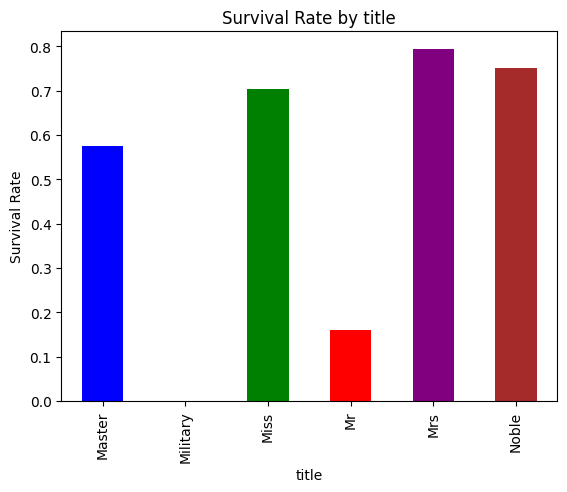

In [13]:
# the survived rate.
plot_ratio_of_survived("title")

# Age

In [17]:
# Missing value
print("Age Missing values =", train_data["Age"].isnull().sum())

Age Missing values = 177


### Filling 177 Missing Age Values by Group Title

#### 🛠️ **Objective**:  
Fill **177 missing values** in the `Age` column using the **average age** of individuals within each `title` group (e.g., "Mr", "Miss", "Mrs").

---

### 📊 **Approach**:

1. **Group Data by Title**:  
   - Titles such as **"Mr"**, **"Miss"**, **"Mrs"**, etc., are used for grouping.
2. **Calculate Group Mean**:  
   - Compute the **average age** within each title group.
3. **Fill Missing Values**:  
   - Replace `NaN` in the `Age` column with the **group's mean age**.


---

### 🎯 **Impact**:
- A total of **177 missing `Age` values** are now filled.
- This ensures no missing values remain in the `Age` column.

---


In [18]:
# Filling missing Age values in train data
train_data["Age"] = train_data.groupby("title")["Age"].transform(lambda x: x.fillna(x.mean()))

# Filling missing Age values in test data using train data means
test_data["Age"] = train_data.groupby("title")["Age"].transform(lambda x: x.fillna(x.mean()))

In [ ]:
def plot_ratio_of_survived_by_age(min, max):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=train_data[(train_data["Age"] >= min) & (train_data["Age"] <= max)], x="Age", fill=True, ax=ax, hue="Survived")
    plt.title(f"Survival Rate by Age")
    plt.xlabel(f"Age")
    plt.ylabel("Survival Rate")
    plt.show()

In [ ]:
# Cabin feature groupped by `null` and `notnull`
train_data["Cabin"] = train_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

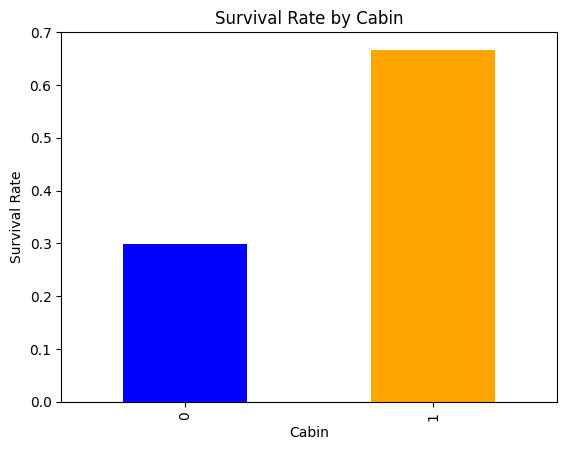

In [ ]:
# ratio of survived
plot_ratio_of_survived("Cabin")

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
test_data["Cabin"] = train_data["Cabin"].apply(lambda x: 0 if pd.isnull(x) else 1)

In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,0


In [ ]:
# missing values Fare by Pclass

train_data["Fare"] = train_data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))
test_data["Fare"] = train_data.groupby("Pclass")["Fare"].transform(lambda x: x.fillna(x.mean()))


In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test_data.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [ ]:
train_data["Embarked"] = train_data.groupby("Pclass")["Embarked"].transform(lambda x: x.fillna(x.mode()[0]))

In [ ]:
train_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"]
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"]

test_data["isAlone"] = train_data["FamilySize"].apply(lambda x: 1 if x == 0 else 0)
train_data["isAlone"] = train_data["FamilySize"].apply(lambda x: 1 if x == 0 else 0)


# Age

In [ ]:
def plot_kde_age(min, max):
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.kdeplot(data=train_data[(train_data["Age"] >= min) & (train_data["Age"] <= max)], x="Age", fill=True, ax=ax, hue="Survived")



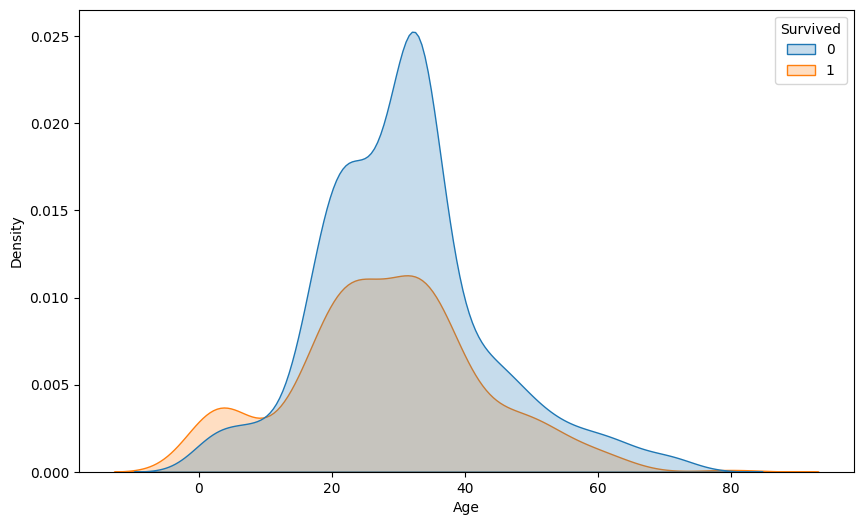

In [ ]:
plot_kde_age(0, 100)